In [1]:
import numpy as np
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from scipy.special import expit
from PIL import Image

In [2]:
def show(x):
    for i in xrange(x.shape[0]):
        plt.figure(figsize=(2,2))
        plt.imshow(x[i].T,cmap= plt.cm.binary )

In [3]:
def softmax(out):
    z = max(out)
    eout = expit(out-z)
    print eout
    probs = eout/np.sum(eout)
    return probs

In [4]:
def sigmoid(x):
    return 1. / (1. + expit(-x))

In [5]:
def relu(x):
    return np.maximum(0,x)

In [6]:
def mx_pool(x):
    layers = x.shape[0]
    img_dim = x.shape[1]
    iter_1 = range(layers)
    iter_2 = range(img_dim)
    ans = np.zeros((layers, img_dim/2, img_dim/2))
    for j in iter_1:
        for i in iter_2:
            for k in iter_2:
                ans[j,i/2,k/2] = np.max(x[j,i:i+2,k:k+2]) 
                k = k + 2
            i = i + 2
    return ans

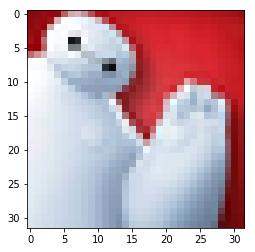

In [7]:
image = Image.open("../input_data/baymax.jpeg",'r')
image = image.resize((32,32),Image.ANTIALIAS)
image_arr = np.asarray(image)
imshow(image_arr)

In [8]:
def conv_layer_1():
    global image_arr
    
    conv_filter_1 = np.random.randint(-10,10,(6,5,5))
    out_c1 = np.zeros((6,28,28))
    
    num_filters = range(out_c1.shape[0])
    image_dim = range(out_c1.shape[1])
    for filter_x in num_filters:
        for w in image_dim:
            for h in image_dim:
                out_c1[filter_x,w,h] = np.sum(image_arr[h:h+5,w:w+5,:].T * conv_filter_1[filter_x])
    print "Image after first convolution with random filter"
    show(out_c1)
    return out_c1

Image after first convolution with random filter


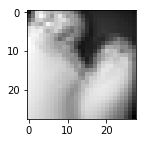

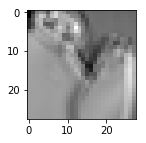

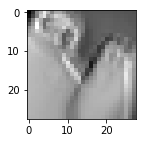

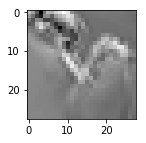

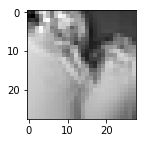

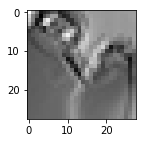

In [9]:
out_c1 = conv_layer_1()

In [10]:
c1_after_relu = relu(out_c1)

In [11]:
# print "after max pooling : "
max_pool_1 = mx_pool(c1_after_relu)
# show(max_pool_1)
max_pool_1 = relu(max_pool_1)

In [12]:
def conv_layer_2():
    global max_pool_1
    
    conv_filter_2 = np.random.randint(-10,10,(16,5,5))
    out_c2 = np.zeros((16,10,10))
    
    num_filters = range(out_c2.shape[0])
    image_dim = range(out_c2.shape[1])
    for filter_x in num_filters:
        for w in image_dim:
            for h in image_dim:
                out_c2[filter_x,w,h] = np.sum(max_pool_1[:,h:h+5,w:w+5] * conv_filter_2[filter_x])
    print "Image after first convolution with random filter"
    show(out_c2)
    return out_c2

Image after first convolution with random filter


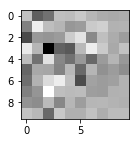

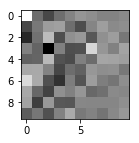

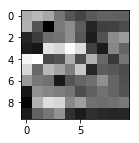

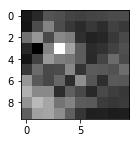

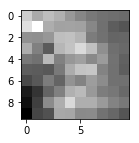

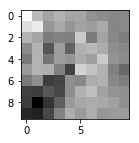

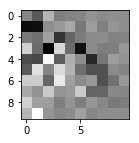

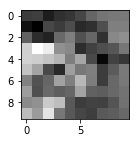

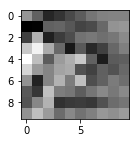

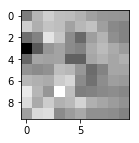

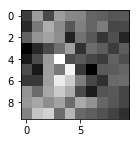

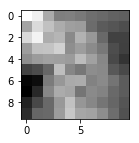

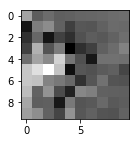

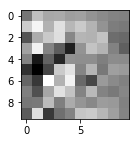

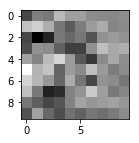

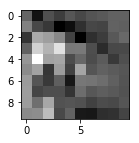

In [13]:
out_c2 = conv_layer_2()

In [14]:
c2_after_relu = relu(out_c2)
# print "after applying Relu : "
# print c1_after_relu
# show(c2_after_relu)

In [15]:
# print "after max pooling : "
FC1 = mx_pool(c2_after_relu)
# show(FC1)

In [16]:
def feedforward(inp):
    weight_inptohid = np.random.randint(-10,10,(120,84))
    weight_hidtoout = np.random.randint(-10,10,(84,10))
    temp = np.dot(inp.T,weight_inptohid)
    
    print temp.shape
    hid_output = sigmoid(temp)
    temp = np.dot(hid_output,weight_hidtoout)
    out_output = sigmoid(temp)
    
    print out_output.shape
    out = softmax(out_output.T)
    
    print "\nOUTPUT :\n",out.T
    ind = np.argwhere(out.T[0] == np.amax(out.T[0]))
    print "\nPredicted class:\n",ind+1

In [17]:
FC1.resize((120,1))
print FC1.shape
feedforward(FC1)

(120, 1)
(1, 84)
(1, 10)
[[0.37754067]
 [0.37754067]
 [0.49999312]
 [0.43190853]
 [0.5       ]
 [0.37754103]
 [0.37754067]
 [0.37754067]
 [0.37754067]
 [0.37759422]]

OUTPUT :
[[0.09265392 0.09265392 0.12270552 0.10599658 0.12270721 0.09265401
  0.09265392 0.09265392 0.09265392 0.09266707]]

Predicted class:
[[5]]
